## Univariate [Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression)

- Logistic regression is an algorithm for **classification**.

- Logistic regression builds a **linear model** that separates the two classes by a hyperplane.

<img src="../_img/linear_classifier.jpg" width="300" align="left">

For simplicity, let' discuss first the **univariate** case, with a **binary target** variable and **no bias** term.

<img src="../_img/logreg_1d.jpg" width="400" align="left">

### The Programming Exam Problem

In [1]:
import pandas as pd
data = [
    {'name': 'David Beckham',    'study_time': 0,   'result': 0},
    {'name': 'Jessica Scott',    'study_time': 7,   'result': 1},
    {'name': 'Jack Johnson',     'study_time': 3.5, 'result': 0},
    {'name': 'Scunner Campbell', 'study_time': 6,   'result': 0},
    {'name': 'Plain Jane ',      'study_time': 3,   'result': 1},
    {'name': 'Archie Gillis',    'study_time': 15,  'result': 1},
]
df = pd.DataFrame(data)
df

,name,study_time,result
0,David Beckham,0.0,0
1,Jessica Scott,7.0,1
2,Jack Johnson,3.5,0
3,Scunner Campbell,6.0,0
4,Plain Jane,3.0,1
5,Archie Gillis,15.0,1


The above toy data set contains 2 attributes of 6 students:
- Hours spent on preparing for the exam.
- Did the student pass the exam? (0=no, 1=yes)

**Exercise 1**: Train a univariate logistic regression model that estimates the `result` column from the `study_time` column!

In [2]:
x = df['study_time'].values # input vector
y = df['result'].values     # target vector

# subtract mean from inpute
xm = x.mean()
x -= xm

print(x,y)

[-5.75  1.25 -2.25  0.25 -2.75  9.25] [0 1 0 0 1 1]


In [3]:
import numpy as np
def sigmoid(t):
    return 1/(1+np.exp(-t))

In [4]:
# sigmoid (x)

w = 0 # initial model parameter

yhat = sigmoid(x*w)
yhat


array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

In [5]:
ce_i = ((yhat - y) * x).sum()

ce_ii= (yhat * (1-yhat) * x**2).sum()

ce_i, ce_ii

(-7.75, 33.21875)

In [6]:
# 1st Newton's step

w -= ce_i / ce_ii
w

0.2333019755409219

In [7]:
yhat = sigmoid(x*w)
yhat

array([0.20726573, 0.57239452, 0.37170029, 0.51457724, 0.34488937,
       0.896418  ])

In [8]:
# 2nd Newton's step

w -= ce_i / ce_ii
w

0.4666039510818438

In [9]:
yhat = sigmoid(x*w)
yhat

array([0.06398561, 0.64181602, 0.2592522 , 0.52912972, 0.21701265,
       0.98682389])

In [10]:
# Newton steps in for loop
for it in range(10):
    yhat = sigmoid(x*w)
    ce = -(np.log(yhat)* y + np.log(1-yhat) * (1-y)).sum()
    ce_i = ((yhat - y) * x).sum()
    ce_ii= (yhat * (1-yhat) * x**2).sum()
    w -= ce_i / ce_ii
    print(f'w = {w:.9f} CE(w) = {ce:.9}')
    print(yhat)

w = 0.333032246 CE(w) = 3.103909
[0.06398561 0.64181602 0.2592522  0.52912972 0.21701265 0.98682389]
w = 0.359110223 CE(w) = 3.06404697
[0.1284274  0.60259521 0.32096893 0.5208025  0.28580655 0.95608321]
w = 0.360846759 CE(w) = 3.06039476
[0.11255707 0.61037476 0.30831727 0.52242933 0.27139565 0.96516813]
w = 0.360853783 CE(w) = 3.06038094
[0.11156354 0.61089086 0.30748466 0.52253764 0.27045238 0.96570413]
w = 0.360853783 CE(w) = 3.06038094
[0.11155953 0.61089295 0.30748129 0.52253808 0.27044857 0.96570628]
w = 0.360853783 CE(w) = 3.06038094
[0.11155953 0.61089295 0.30748129 0.52253808 0.27044857 0.96570628]
w = 0.360853783 CE(w) = 3.06038094
[0.11155953 0.61089295 0.30748129 0.52253808 0.27044857 0.96570628]
w = 0.360853783 CE(w) = 3.06038094
[0.11155953 0.61089295 0.30748129 0.52253808 0.27044857 0.96570628]
w = 0.360853783 CE(w) = 3.06038094
[0.11155953 0.61089295 0.30748129 0.52253808 0.27044857 0.96570628]
w = 0.360853783 CE(w) = 3.06038094
[0.11155953 0.61089295 0.30748129 0.5225

In [11]:
ce = -(np.log(yhat)* y + np.log(1-yhat) * (1-y)).sum()

Text(0, 0.5, 'P(passing the exam)')

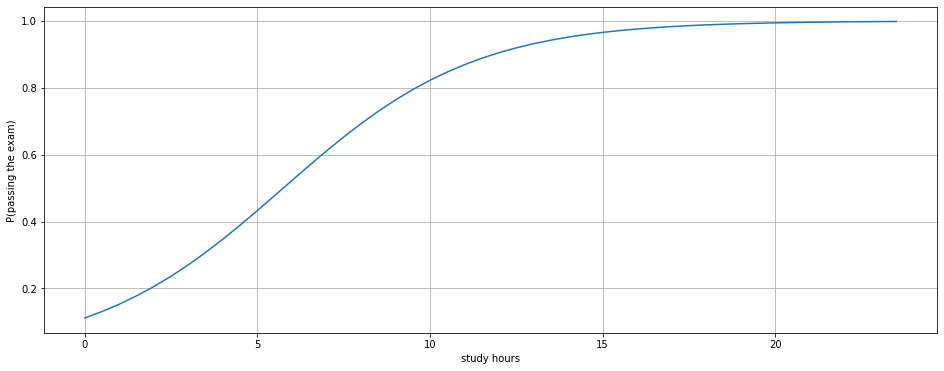

In [12]:
# Display the probability of passing the exam (according to the model)
# as a function of the study hours!
import matplotlib.pyplot as plt
x2 = np.arange(0, 24, 0.5)
yhat2 = sigmoid((x2 - xm) * w)
plt.figure(figsize=(16,6))
plt.plot(x2, yhat2)
plt.grid(True)
plt.xlabel('study hours')
plt.ylabel('P(passing the exam)')

### The Wisconsin Breast Cancer Problem

<img src="../_img/wisconsin_illustration.jpg" width="200" align="left">

The Wisconsin Breast Cancer data set contains the attributes of 699 suspicious lesions in tissue microscopy images. The raw data is contained in [wisconsin_data.txt](../_data/wisconsin_data.txt), the description can be read in [wisconsin_names.txt](../_data/wisconsin_names.txt). The task is to estimate if the lesion is malicious (4) or benign (2), based on the image attributes of the lesion. Therefore the task is a binary classification problem.

**Exercise 2**: Train a univariate logistic regression model for each input feature separately, and measure the *average* cross-entropy of the models! Use the full data set both for training and evaluation!

In [13]:
# Column names.
names = [
    'Sample_code_number',
    'Clump_Thickness',
    'Uniformity_of_Cell_Size',
    'Uniformity_of_Cell_Shape',
    'Marginal_Adhesion',
    'Single_Epithelial_Cell_Size',
    'Bare_Nuclei',
    'Bland_Chromatin',
    'Normal_Nucleoli',
    'Mitoses',
    'Class'
]

In [14]:
df = pd.read_csv('wisconsin_data.txt', sep=',', names=names, na_values='?')
# we found some ? values, so we replaced it with nan
df

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample_code_number           699 non-null    int64  
 1   Clump_Thickness              699 non-null    int64  
 2   Uniformity_of_Cell_Size      699 non-null    int64  
 3   Uniformity_of_Cell_Shape     699 non-null    int64  
 4   Marginal_Adhesion            699 non-null    int64  
 5   Single_Epithelial_Cell_Size  699 non-null    int64  
 6   Bare_Nuclei                  683 non-null    float64
 7   Bland_Chromatin              699 non-null    int64  
 8   Normal_Nucleoli              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [16]:
df.Bare_Nuclei.unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7., nan,  5.,  8.,  6.])

In [17]:
# replace the nan with the mean
df['Bare_Nuclei'].fillna(df['Bare_Nuclei'].mean(), inplace=True)
df

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


In [18]:
df.Bare_Nuclei.unique()

array([ 1.        , 10.        ,  2.        ,  4.        ,  3.        ,
        9.        ,  7.        ,  3.54465593,  5.        ,  8.        ,
        6.        ])

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sample_code_number,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
Clump_Thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity_of_Cell_Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity_of_Cell_Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal_Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single_Epithelial_Cell_Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Bare_Nuclei,699.0,3.544656e+00,3.601852,1.0,1.0,1.0,5.0,10.0
Bland_Chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Normal_Nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0


In [20]:
# target vector
y = df['Class'].values//2-1
y

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,

In [21]:
def fit_logreg(x, y, niter=10):
    w = 0 # initial model parameter
    yhat = sigmoid(x*w)
    for it in range(niter):
        ce = -(np.log(yhat)* y + np.log(1-yhat) * (1-y)).sum()
        ce_i = ((yhat - y) * x).sum()
        ce_ii= (yhat * (1-yhat) * x**2).sum()
        w -= ce_i / ce_ii
        yhat = sigmoid(x*w)
        return w, yhat

In [22]:
    
def avg_ce(y, yhat):
    ce = -(np.log(yhat)* y + np.log(1-yhat) * (1-y)).sum()
    return ce/len(y)
    

In [23]:
for column in names[1:-1]:
    x = df[column]
    w, yhat = fit_logreg(x, y)
    cem = avg_ce(y, yhat)
    print(column)
    print(f'w = {w:.9f} CE(w) = {ce:.9}')
    print(f'CEm(w) = {cem:.9}')

Clump_Thickness
w = 0.039632874 CE(w) = 3.06038094
CEm(w) = 0.687739208
Uniformity_of_Cell_Size
w = 0.146180893 CE(w) = 3.06038094
CEm(w) = 0.639204697
Uniformity_of_Cell_Shape
w = 0.137765798 CE(w) = 3.06038094
CEm(w) = 0.645652807
Marginal_Adhesion
w = 0.127165565 CE(w) = 3.06038094
CEm(w) = 0.659383857
Single_Epithelial_Cell_Size
w = 0.057453999 CE(w) = 3.06038094
CEm(w) = 0.6868162
Bare_Nuclei
w = 0.132577858 CE(w) = 3.06038094
CEm(w) = 0.633926393
Bland_Chromatin
w = 0.077189590 CE(w) = 3.06038094
CEm(w) = 0.679762996
Normal_Nucleoli
w = 0.134160274 CE(w) = 3.06038094
CEm(w) = 0.651733288
Mitoses
w = 0.071746531 CE(w) = 3.06038094
CEm(w) = 0.689591602


In [24]:
# 2nd solution Normalized input
def logreg_predict(x, w):
    return sigmoid(x * w)

def logreg_fit(x, y, niter=10):
    w = 0 # initial model parameter
    for it in range(niter):
        yhat = logreg_predict(x, w)
        ce_i = ((yhat - y) * x).sum()
        ce_ii = (yhat * (1 - yhat) * x**2).sum()
        w -= ce_i / ce_ii # Newton step    
    return w

def avg_cross_entropy(y, yhat):
    ce = -(np.log(yhat) * y + np.log(1 - yhat) * (1 - y)).sum()
    return ce / len(y)
    
for column in names[1:-1]:
    se = df[column]
    x = (se - se.mean()).values # input vector
    w = logreg_fit(x, y)
    yhat = logreg_predict(x, w)
    ace = avg_cross_entropy(y, yhat)
    print(f'{column:30} AvgCE={ace:.9f} w={w:.9f}')

Clump_Thickness                AvgCE=0.390611001 w=0.905912818
Uniformity_of_Cell_Size        AvgCE=0.199170002 w=1.572130112
Uniformity_of_Cell_Shape       AvgCE=0.211668062 w=1.524221657
Marginal_Adhesion              AvgCE=0.359316116 w=1.107418964
Single_Epithelial_Cell_Size    AvgCE=0.351132841 w=1.537879946
Bare_Nuclei                    AvgCE=0.265288430 w=0.979151501
Bland_Chromatin                AvgCE=0.303804235 w=1.542319399
Normal_Nucleoli                AvgCE=0.355869859 w=1.004452002
Mitoses                        AvgCE=0.527654735 w=1.711238337


**Exercise 4**: Repeat the previous experiment using scikit-learn!

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

for column in names[1:-1]:
    se = df[column]
    x = (se - se.mean()).values # input vector
    cl = LogisticRegression(fit_intercept=False, C=1e12) # define model
    X = x.reshape((-1,1))
    cl.fit(X, y)                                         # train model
    w = cl.coef_[0,0]                                    # extract moddel parameter
    yhat = cl.predict_proba(X)[:,1]                      # make probability prediction
    ace = log_loss(y, yhat)                              # compute average cross entropy
    
    print(f'{column:30} AvgCE={ace:.9f} w={w:.9f}')

Clump_Thickness                AvgCE=0.390611001 w=0.905912814
Uniformity_of_Cell_Size        AvgCE=0.199170002 w=1.572130109
Uniformity_of_Cell_Shape       AvgCE=0.211668062 w=1.524221656
Marginal_Adhesion              AvgCE=0.359316116 w=1.107418964
Single_Epithelial_Cell_Size    AvgCE=0.351132841 w=1.537879938
Bare_Nuclei                    AvgCE=0.265288430 w=0.979151504
Bland_Chromatin                AvgCE=0.303804235 w=1.542318627
Normal_Nucleoli                AvgCE=0.355869859 w=1.004451975
Mitoses                        AvgCE=0.527654735 w=1.711237945


**Exercise 5**: Introduce a 70-30% train-test split and re-run the experiment!

In [26]:
from sklearn.model_selection import ShuffleSplit
# another way of set test size is: train_test_split
tr, te = next(ShuffleSplit(test_size=0.3, random_state=42).split(df))
tr, te

(array([357, 648, 291, 420, 177, 456, 444,  83, 453, 354, 495, 575,  79,
         23,  15, 381, 292, 275, 653, 314, 519, 137, 485, 483,  33, 662,
        257,   9,  22, 543, 221, 404, 684, 334,  84, 335, 247, 582, 620,
        203, 196, 660, 327, 399,  93, 587, 294, 265, 375, 184, 636, 512,
        153,  75, 332,  68, 615, 188, 236,  88, 590, 117, 125, 571, 238,
          0, 691, 530, 630, 608, 278, 116, 228, 697, 319, 274, 692, 144,
        382, 426, 631, 500, 268, 465,  46, 261, 195, 698, 583, 107, 462,
        609, 531, 100, 350, 624, 333, 179, 304, 349, 149, 124, 551, 605,
        185, 428, 558, 689, 344, 644, 142, 141, 393, 320,  19, 172, 632,
        312, 650,  12, 305,  25, 518, 169, 479, 411, 245, 298, 434, 272,
        154, 126, 538, 341, 287, 113, 367, 173, 355,  57, 443, 222, 280,
         17, 405, 322, 255, 417, 669, 190, 439, 616, 490,  94, 180, 301,
        641, 511, 642, 451, 429,   5, 685,  45, 398, 525, 171,  16,  48,
        675, 639,   3, 449, 412, 316, 643, 283, 581

In [27]:
for column in names[1:-1]:
    se = df[column]
    x = (se - se.mean()).values # input vector
    cl = LogisticRegression(fit_intercept=False, C=1e12) # define model
    X = x.reshape((-1,1))
    cl.fit(X[tr], y[tr])                                 # train model (on training set)
    w = cl.coef_[0,0]                                    # extract moddel parameter
    yhat = cl.predict_proba(X)[:,1]                      # make probability prediction
    ace = log_loss(y[te], yhat[te])                      # compute average cross entropy (on test set)
    
    print(f'{column:30} AvgCE={ace:.9f} w={w:.9f}')

Clump_Thickness                AvgCE=0.335747286 w=0.826808279
Uniformity_of_Cell_Size        AvgCE=0.176748276 w=1.515755629
Uniformity_of_Cell_Shape       AvgCE=0.217456999 w=1.535220556
Marginal_Adhesion              AvgCE=0.300066855 w=1.024555296
Single_Epithelial_Cell_Size    AvgCE=0.350178198 w=1.527215223
Bare_Nuclei                    AvgCE=0.311173420 w=1.008497031
Bland_Chromatin                AvgCE=0.306641746 w=1.453926694
Normal_Nucleoli                AvgCE=0.362623274 w=1.024082073
Mitoses                        AvgCE=0.491826787 w=1.562289264


### Multivariate Logistic Regression

The previous approach can be generalized to allows multiple input features.

- model's prediction: $\hat{y} = \sigma(Xw)$<br>
- objective function: $CE(w) = -\log(\hat{y})^Ty - \log(1 - \hat{y})^T(1 - y)$<br>
- gradient vector: $\frac{d}{dw} CE(w) = X^T(\hat{y} - y)$<br>
- Hessian matrix: $\left(\frac{d}{dw}\right)^2 CE(w) = X^T \mathrm{diag}\left(\hat{y}(1 - \hat{y})\right) X$
- Newton-step: $w_{\mathrm{new}} = w - \left[\left(\frac{d}{dw}\right)^2 CE(w)\right]^{-1} \left[\frac{d}{dw} CE(w)\right]$

Similarly to linear regression, the bias term can be handled by introducing a constant 1 feature.
<br><br>

**Exercise 6**: Train a multivariate logistic regression model on the training set and measure its cross-entropy on the test set! Implement the training algorithm without using scikit-learn!

In [28]:
# input matrix
X = df[names[1:-1]].values
# target vector
y = df['Class'].values//2-1
print(X.shape)

# initial model
w = np.zeros(X.shape[1])

# prediction
yhat = sigmoid(X @ w)

# gradient of cross-entropy
g = X.T @ (yhat - y)
g

(699, 9)


array([-190.        , -488.5       , -460.        , -356.        ,
       -153.        , -591.23206442, -239.5       , -411.        ,
        -68.5       ])

In [30]:
# Hessian matrix of cross-entropy
H = X.T * (yhat * (1 - yhat)) @ X
H

array([[4794.        , 3386.75      , 3432.        , 2849.25      ,
        3050.5       , 3775.85285505, 3323.        , 3017.25      ,
        1522.        ],
       [3386.75      , 3341.75      , 3192.        , 2610.25      ,
        2648.        , 3258.81039531, 2864.25      , 2745.75      ,
        1289.5       ],
       [3432.        , 3192.        , 3339.        , 2584.75      ,
        2629.        , 3312.26354319, 2857.5       , 2746.25      ,
        1281.25      ],
       [2849.25      , 2610.25      , 2584.75      , 2799.5       ,
        2239.        , 2932.19875549, 2496.25      , 2324.25      ,
        1136.5       ],
       [3050.5       , 2648.        , 2629.        , 2239.        ,
        2663.        , 2801.06039531, 2512.5       , 2353.25      ,
        1210.75      ],
       [3775.85285505, 3258.81039531, 3312.26354319, 2932.19875549,
        2801.06039531, 4459.50834264, 3165.30819912, 2883.99121523,
        1349.67862372],
       [3323.        , 2864.25      , 28

In [33]:
# Newton-step
w -= np.linalg.solve(H, g)
w

array([-0.5109304 ,  1.11234173,  0.27328331,  0.04948115, -0.97918294,
        0.73256627, -0.72881045,  0.41669609, -0.28989454])

In [34]:
# Newton loop
w = np.zeros(X.shape[1])
niter = 10
for it in range(niter):
    # prediction
    yhat = sigmoid(X @ w)
    # cross-entropy
    ce = -np.log(yhat) @ y - np.log(1 - yhat) @ (1 - y)
    # gradient of cross-entropy
    g = X.T @ (yhat - y)
    # Hessian matrix of cross-entropy
    H = X.T * (yhat * (1 - yhat)) @ X
    print(it, ce)
    # Newton-step
    w -= np.linalg.solve(H, g)
    

0 484.50987921140165
1 320.0112328042882
2 285.73437841351625
3 277.70418009292183
4 277.0625947428168
5 277.05704693001366
6 277.0570464294203
7 277.0570464294203
8 277.0570464294204
9 277.0570464294203


In [38]:
def cross_entropy(y, yhat):
    return -np.log(yhat) @ y - np.log(1 - yhat) @ (1 - y)

def logreg_m_fit(X, y, niter=10):
    w = np.zeros(X.shape[1])
    for it in range(niter):
        # prediction
        yhat = sigmoid(X @ w)
        # cross-entropy
        ce = cross_entropy(y, yhat)
        # gradient of cross-entropy
        g = X.T @ (yhat - y)
        # Hessian matrix of cross-entropy
        H = X.T * (yhat * (1 - yhat)) @ X
        print(it, ce)
        # Newton-step
        w -= np.linalg.solve(H, g)
    return w

In [39]:
w = logreg_m_fit(X[tr], y[tr])
w

0 338.9489712938133
1 219.31492649580565
2 194.84385525659366
3 189.2334455179607
4 188.79436565306744
5 188.79058752143467
6 188.7905871820355
7 188.79058718203555
8 188.79058718203555
9 188.79058718203552


array([-0.37775352,  0.81513883,  0.24794682, -0.00703306, -0.7267206 ,
        0.585522  , -0.43993472,  0.32078896, -0.23507939])

In [41]:
# testing
yhat = sigmoid(X @ w)
cross_entropy(y[te], yhat[te])

92.3437344981877

In [45]:
w

array([-0.37775352,  0.81513883,  0.24794682, -0.00703306, -0.7267206 ,
        0.585522  , -0.43993472,  0.32078896, -0.23507939])

**Exercise 7**: Use scikit-learn for training the model and compare the results against the previous experiment's results!

In [54]:
from sklearn.linear_model import LogisticRegression

cl = LogisticRegression(fit_intercept=False, C=1e12) # no bies, no regularization
cl.fit(X[tr], y[tr])
yhat = cl.predict_proba(X)[:,1]
ce = cross_entropy(y[te], yhat[te])
print (ce, ce / len(te))

28.330792605335226 0.4105911971787714


In [44]:
cl.coef_[0]

array([-0.37775325,  0.81513397,  0.24796104, -0.00703901, -0.72671579,
        0.58551021, -0.43993414,  0.32079127, -0.23508148])

### $K$-Fold Cross-Validation
- Idea: Randomly split the data to $K$ roughly equal partitions and run $K$ experiments!
- In the $i$-th experiment, partition $i$ is used as the test set and all other partitions as the training set.
- In the end, the scores obtained from the $K$ experiments are averaged.
- $K$-fold cross-validation is slower but more reliable than the simple train-test split.
- In the *stratified* variant of the method, the same distribution of labels is enforced in every partition.

<img src="../_img/cross_val.jpg" width="350" align="left" style="opacity: 0.8">

**Exercise 8**: Replace the train-test split to 10-fold cross valiadtion and re-run the last experiment!

In [50]:
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss

cv = KFold(10, shuffle=True, random_state=42)

In [51]:
scores = []
for tr, te in cv.split(X):
    cl = LogisticRegression(fit_intercept=False, C=1e12) # no bies, no regularization
    cl.fit(X[tr], y[tr])
    yhat = cl.predict_proba(X)[:,1]
    score = log_loss(y[te], yhat[te])
    scores.append(score)

In [52]:
scores

[0.3103854498633047,
 0.5013502260500776,
 0.492728969735146,
 0.34584544309166304,
 0.5820155518006203,
 0.3244320020003381,
 0.4848963100207666,
 0.3690964445150554,
 0.38712987311278146,
 0.41059119717877135]

In [53]:
np.mean(scores)

0.4208471467368525